# **Data Loading**

 **import Library**

In [70]:
import zipfile, math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from google.colab import files

In [71]:
df = pd.read_csv('/content/coin_Ethereum.csv')
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.set_index('Date', inplace= True)
df

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08 23:59:59,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
2015-08-09 23:59:59,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2015-08-10 23:59:59,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
2015-08-11 23:59:59,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
2015-08-12 23:59:59,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2156,Ethereum,ETH,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2021-07-03 23:59:59,2157,Ethereum,ETH,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2021-07-04 23:59:59,2158,Ethereum,ETH,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11


# **Exploratory Data Analysis**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 2015-08-08 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   High       2160 non-null   float64
 4   Low        2160 non-null   float64
 5   Open       2160 non-null   float64
 6   Close      2160 non-null   float64
 7   Volume     2160 non-null   float64
 8   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 168.8+ KB


In [73]:
df.drop(['SNo', 'Name', 'Symbol', 'Volume','Marketcap'],axis=1,inplace=True)
df['OHLC_Average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df

,High,Low,Open,Close,OHLC_Average
Date,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,1.765155
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,0.729258
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0.697209
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,0.892648
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,1.112435
...,...,...,...,...,...
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,2109.338586
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,2183.026619
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,2280.849764


In [74]:
df.describe()

,High,Low,Open,Close,OHLC_Average
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,398.258568,365.592589,382.879899,383.910691,382.660437
std,628.082281,566.611523,599.719862,601.078766,598.379135
min,0.482988,0.420897,0.431589,0.434829,0.445701
25%,14.265225,13.190950,13.757600,13.819200,13.781150
50%,205.124631,193.302715,198.425096,198.643691,199.173891
75%,396.494561,375.146804,386.264935,386.435272,385.384572
max,4362.350542,3785.848603,4174.635873,4168.701049,4027.170905


In [75]:
df['Price_After_Month']=df['Close'].shift(-30)

In [76]:
df.tail()

,High,Low,Open,Close,OHLC_Average,Price_After_Month
Date,,,,,,
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,2109.338586,NaN
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,2183.026619,NaN
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,2280.849764,NaN
2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2251.367382,NaN
2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2266.703274,NaN


# **Menangani Missing Value dan Outlier**


In [77]:
df.isnull().sum()
#df.isna().sum()

High                  0
Low                   0
Open                  0
Close                 0
OHLC_Average          0
Price_After_Month    30
dtype: int64

Dari hasil prediksi diatas, tidak terdapat Missing Value pada setiap variabel



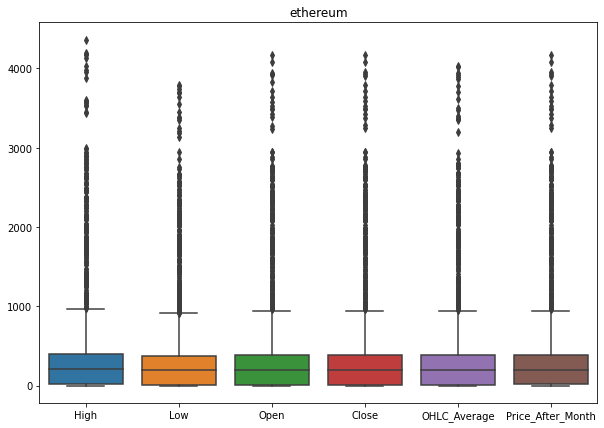

In [78]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("ethereum")
plt.show()

diatas, terdapat beberapa outlier pada variabel


In [67]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(1798, 6)

Untuk mengatasi Outlier, maka memerlukan penentuan batas atas dan bawah nilai quartil pada data

**Univariate Analysis**

menganalisis Numerical Features pada dataset dengan menampilkan plot dan grafik

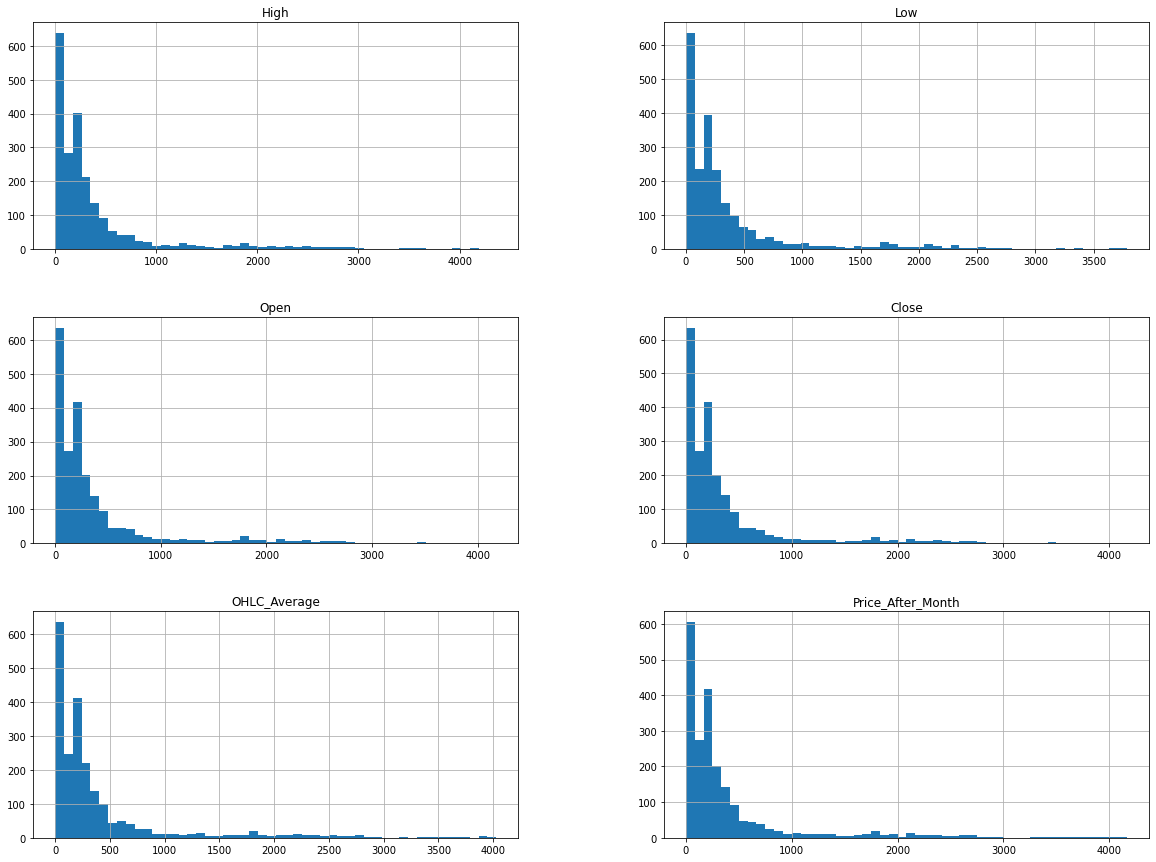

In [79]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analysis**

menganalisis Numerical Features pada dataset dengan menampilkan plot dan grafik relasinya

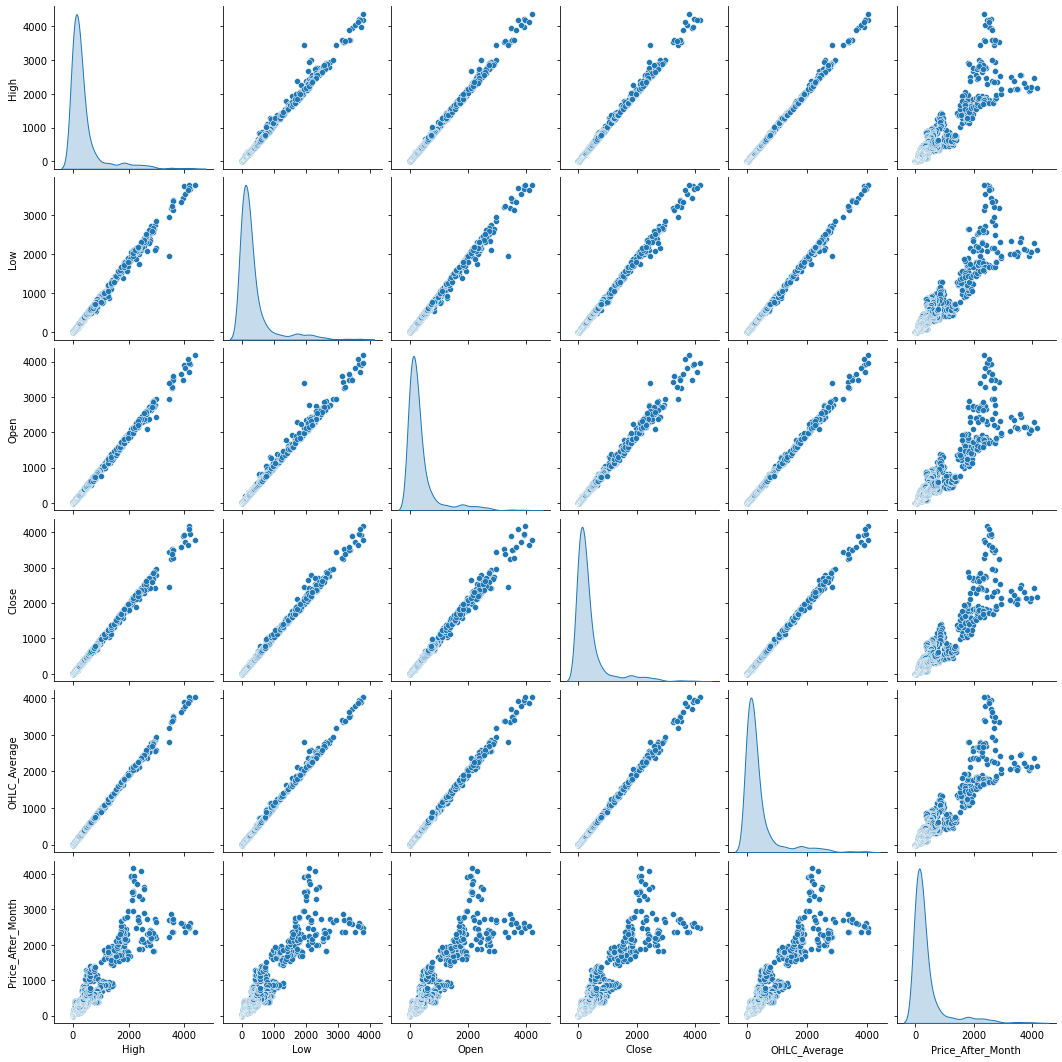

In [80]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

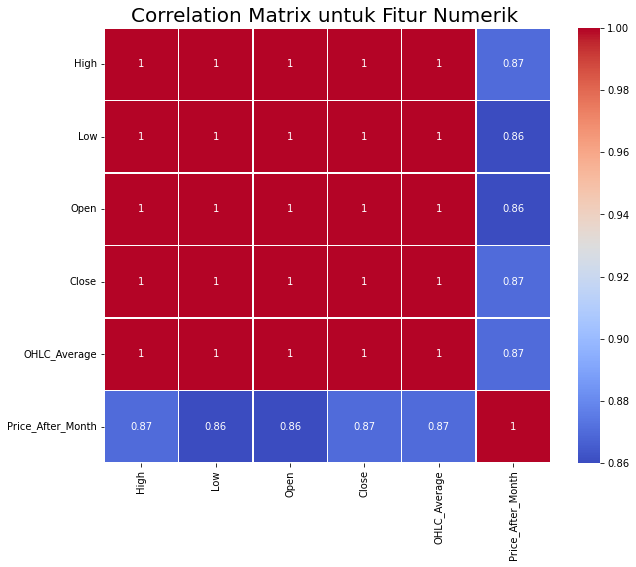

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

berdasarkan tabel diatas dapat disimpulkan bahwa nilai korelasi antar variabel bernilai lebih dari 0.8 atau mendekati 1.

# **Data Preparation**

**Train Test Split**

In [46]:
X = df.drop('Price_After_Month',axis=1)
y = df['Price_After_Month']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [48]:
print(f'dataset: {len(X)}')
print(f'train dataset: {len(X_train)}')
print(f'test dataset: {len(X_test)}')

dataset: 1879
train dataset: 1503
test dataset: 376


**Standarisasi**

In [49]:
numerical_features = ['High', 'Low', 'Open']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,High,Low,Open
Date,,,
2017-04-05 23:59:59,-0.785120,-0.789861,-0.794341
2019-04-12 23:59:59,-0.163216,-0.132429,-0.139803
2020-11-23 23:59:59,2.170474,2.069904,1.990339
2020-09-01 23:59:59,1.524954,1.397265,1.322182
2019-09-13 23:59:59,-0.082400,-0.033371,-0.054969


**Model Development**

In [50]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

**K-Nearest Neighbor**

In [51]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

**Random Forest**

In [52]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**Boosting Algorithm**

In [53]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **Evaluasi Model**

**Mengukur seberapa kecil nilai error MSE**

In [81]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,5.385045,7.326169
RF,1.02805,49.738891
Boosting,6.116459,115.669911


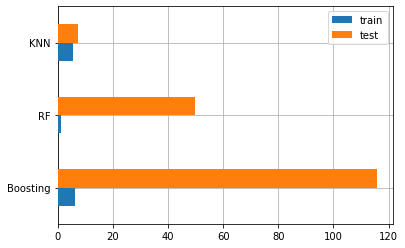

In [55]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, KNN memberikan nilai eror yang paling kecil.

# **Menghitung nilai akurasi model**

In [56]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100

In [57]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,79.778878
Random Forest,-37.285420
Boosting,-219.263093


Dari hasil evaluasi di atas dapat memberikan informasi bahwa Model KNN memiliki tingkat akurasi yang paling tinggi

In [58]:
X_30=X[-30:]
forecast=knn.predict(X_30)

In [59]:
df1=pd.DataFrame(forecast,columns=['Forecast'])
df1=df.append(df1)
df1.drop(['High', 'Low', 'Open'],axis=1,inplace=True)

In [60]:
df1.tail(35)

,Close,OHLC_Average,Price_After_Month,Forecast
2020-11-29 23:59:59,575.758048,555.653142,731.520119,NaN
2020-11-30 23:59:59,614.842522,594.344475,751.618972,NaN
2020-12-01 23:59:59,587.324187,602.327265,737.803398,NaN
2020-12-02 23:59:59,598.352342,592.094355,730.367569,NaN
2020-12-03 23:59:59,616.708755,606.491750,774.534968,NaN
0,NaN,NaN,NaN,506.598382
1,NaN,NaN,NaN,445.822796
2,NaN,NaN,NaN,517.910984
3,NaN,NaN,NaN,478.393043
4,NaN,NaN,NaN,459.811384


Berikut adalah nilai prediksi 30 hari kedepan yang didapat dari metode terbaik yaitu KNN yang dievaluasikan sebelumnya.